<a href="https://colab.research.google.com/github/Ritvik896/DIP/blob/main/DIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [2]:
def contour():
  image = cv2.imread('bubblingFish.jpg')
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  edged = cv2.Canny(gray, 30, 200)
  cv2.waitKey(0)
  contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  Canny_Edges_After_Contouring=cv2_imshow(edged)
  cv2.imwrite('CannyFish.jpg', edged)
  cv2.waitKey(0)

  print("Number of Contours: " + str(len(contours)))

  cv2.drawContours(image, contours, -1, (0, 255, 0), 3)

  Contours =cv2_imshow( image)
  cv2.waitKey(0) 

  image2 = cv2.imread('bubblingFish.jpg')
  if len(contours) != 0:
    c = max(contours, key = cv2.contourArea)
  cv2.drawContours(image2, c, -1, (0, 255, 0), 3)
  Largest_Contour =cv2_imshow( image2)
  cv2.imwrite('LargestContour.jpg', image2) 
  cv2.waitKey(0) 
  cv2.destroyAllWindows() 

In [3]:
def polygon():
  count=0
  img = cv2.imread('polygons.jpg', cv2.IMREAD_GRAYSCALE)  
  gray=cv2_imshow(img)
  cv2.waitKey(0)

  _,threshold = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY) 
  Threshold_Image=cv2_imshow(threshold)
  cv2.imwrite('Threshold.jpg', threshold)
  cv2.waitKey(0)

  contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
  Contours=cv2_imshow(img)
  cv2.imwrite('Contours.jpg', img)
  cv2.waitKey(0)

  image2 = cv2.imread('polygons.jpg')
  for contour in contours:
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour,0.05 * cv2.arcLength(contour, True), True)
    if len(approx) == 3	:
      cv2.drawContours(image2, contour, -1, (0, 0, 0), 3)
      count = count + 1

  print("Number of Triangles in the image: " + str(count)) 
  Triangles_Detected=cv2_imshow(image2)
  cv2.imwrite('Triangles.jpg', image2)
  cv2.waitKey(0) 
  cv2.destroyAllWindows() 

In [4]:
def transformation():
  img = cv2.imread('1.jpg', 0)
  (h,w) = img.shape[:2]
  for i in range(h):
    for j in range(w):
      if(img[i][j] > 105 and img[i][j] < 165):
        img[i][j] =10

  image=cv2_imshow(img)
  cv2.imwrite("image.jpg", img)
  cv2.waitKey(0)
  cv2.destroyAllWindows() 


Enter a number: 3


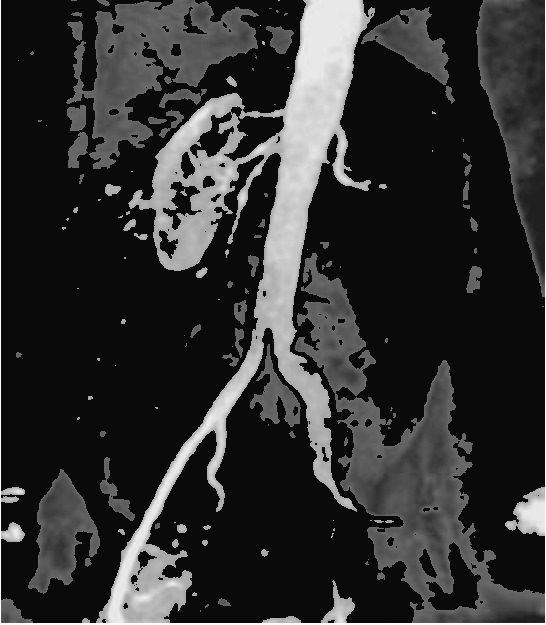

KeyboardInterrupt: ignored

In [8]:
# 0 -> Exit
# 1 -> Contour
# 2 -> Polygon
n = 1
while(n!=0):
  n = int(input("\nEnter a number: "))
  if(n==1):
    contour()
  if(n==2):
    polygon()
  if(n==3):
    transformation()
  else:
    break

print("\nPROGRAM EXITED...\n")